In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt

%matplotlib notebook

In [2]:
sector_data = pd.read_csv("Resources/fortune_1000_part.csv", thousands=',')
new_sector_data = sector_data.drop(columns=['Company', 'Revenues ($M)', 'Profits ($M)', 'Assets ($M)'], axis=1)
new_sector_data.head()

,Employees,Sector,Industry,City,State
0,2300000,Retailing,General Merchandisers,Bentonville,AR
1,71200,Energy,Petroleum Refining,Irving,TX
2,377000,Financials,Insurance: Property and Casualty (Stock),Omaha,NE
3,123000,Technology,"Computers, Office Equipment",Cupertino,CA
4,260000,Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN


In [3]:
# Figure out the following: Biggest/most popular Sector by State
# Compare that by the # of employees per sector

#Bar graph for both above
#x axis: Sector Names

#Define biggest/most popular sector by total number of employees in each sector

In [4]:
new_sector_data["Employees"] = pd.to_numeric(sector_data["Employees"])

In [5]:
sorted_sector_data = new_sector_data.sort_values("Employees", ascending=False)
sorted_sector_data.head()

,Employees,Sector,Industry,City,State
0,2300000,Retailing,General Merchandisers,Bentonville,AR
7,566000,Retailing,Internet Services and Retailing,Seattle,WA
396,450000,"Hotels, Restaurants & Leisure",Food Services,Plano,TX
16,449000,Food & Drug Stores,Food and Drug Stores,Cincinnati,OH
22,413000,Retailing,Specialty Retailers: Other,Atlanta,GA


In [6]:
grouped_states_df = new_sector_data.groupby(['State', 'Sector'])['Employees'].sum()
grouped_states_df =grouped_states_df.reset_index()
grouped_states_df.head()

,State,Sector,Employees
0,AL,Financials,21714
1,AL,Health Care,30935
2,AL,Materials,8287
3,AR,Energy,1128
4,AR,"Food, Beverages & Tobacco",122000


In [7]:
grouped_df_2 = grouped_states_df.set_index('Sector')
grouped_df_2.head()

df_final_1 = grouped_df_2.groupby(['State'])[('Employees')].idxmax().reset_index()

In [8]:
grouped_df_3 = grouped_states_df.groupby(['State'])['Employees'].max()
df_final_2 = grouped_df_3.reset_index()

In [9]:
merged_StateMax = pd.merge(df_final_1, df_final_2, on='State')
merged_StateMax

,State,Employees_x,Employees_y
0,AL,Health Care,30935
1,AR,Retailing,2338300
2,AZ,Technology,99243
3,CA,Technology,1129452
4,CO,"Hotels, Restaurants & Leisure",89040
5,CT,Aerospace & Defense,210959
6,DE,Chemicals,7000
7,FL,"Hotels, Restaurants & Leisure",283729
8,GA,Transportation,432979
9,HI,Transportation,8607


In [10]:
merged_StateMax['State & Sector'] = merged_StateMax['State'].str.cat(merged_StateMax['Employees_x'],sep=" -- ")
merged_StateMax

,State,Employees_x,Employees_y,State & Sector
0,AL,Health Care,30935,AL -- Health Care
1,AR,Retailing,2338300,AR -- Retailing
2,AZ,Technology,99243,AZ -- Technology
3,CA,Technology,1129452,CA -- Technology
4,CO,"Hotels, Restaurants & Leisure",89040,"CO -- Hotels, Restaurants & Leisure"
5,CT,Aerospace & Defense,210959,CT -- Aerospace & Defense
6,DE,Chemicals,7000,DE -- Chemicals
7,FL,"Hotels, Restaurants & Leisure",283729,"FL -- Hotels, Restaurants & Leisure"
8,GA,Transportation,432979,GA -- Transportation
9,HI,Transportation,8607,HI -- Transportation


In [11]:
to_drop = ['Michigan', 'Puerto Rico']

df_final_3 = merged_StateMax.query('State not in @to_drop')
df_final_4 = df_final_3.reset_index()

In [12]:
df_final_4.rename(columns={'Employees_x':'Sector',
                          'Employees_y':'# Employees'}, 
                 inplace=True)

df_final_5 = df_final_4

In [13]:
df_final_5.to_csv("CSV_file/Final_Dataframe.csv", index=False)

In [14]:
#fig, ax = plt.subplots()
# x_axis = reformat_df.index

#title = ax.set_title("\n".join(wrap("title here if its long", 60)), fontweight="bold")

#fig.suptitle("Title of this chart")
# ax.set_xlabel("Number of Fortune 500 Companies per State")
#ax.set_ylabel("# of Employees")

# ax.set_ylim(30,75)
# ax.grid()

#ax.bar(df_final_4["State & Sector"], df_final_4["# Employees"])
#plt.savefig("Images/top5highestavgwage.png")
#make this more pretty pls

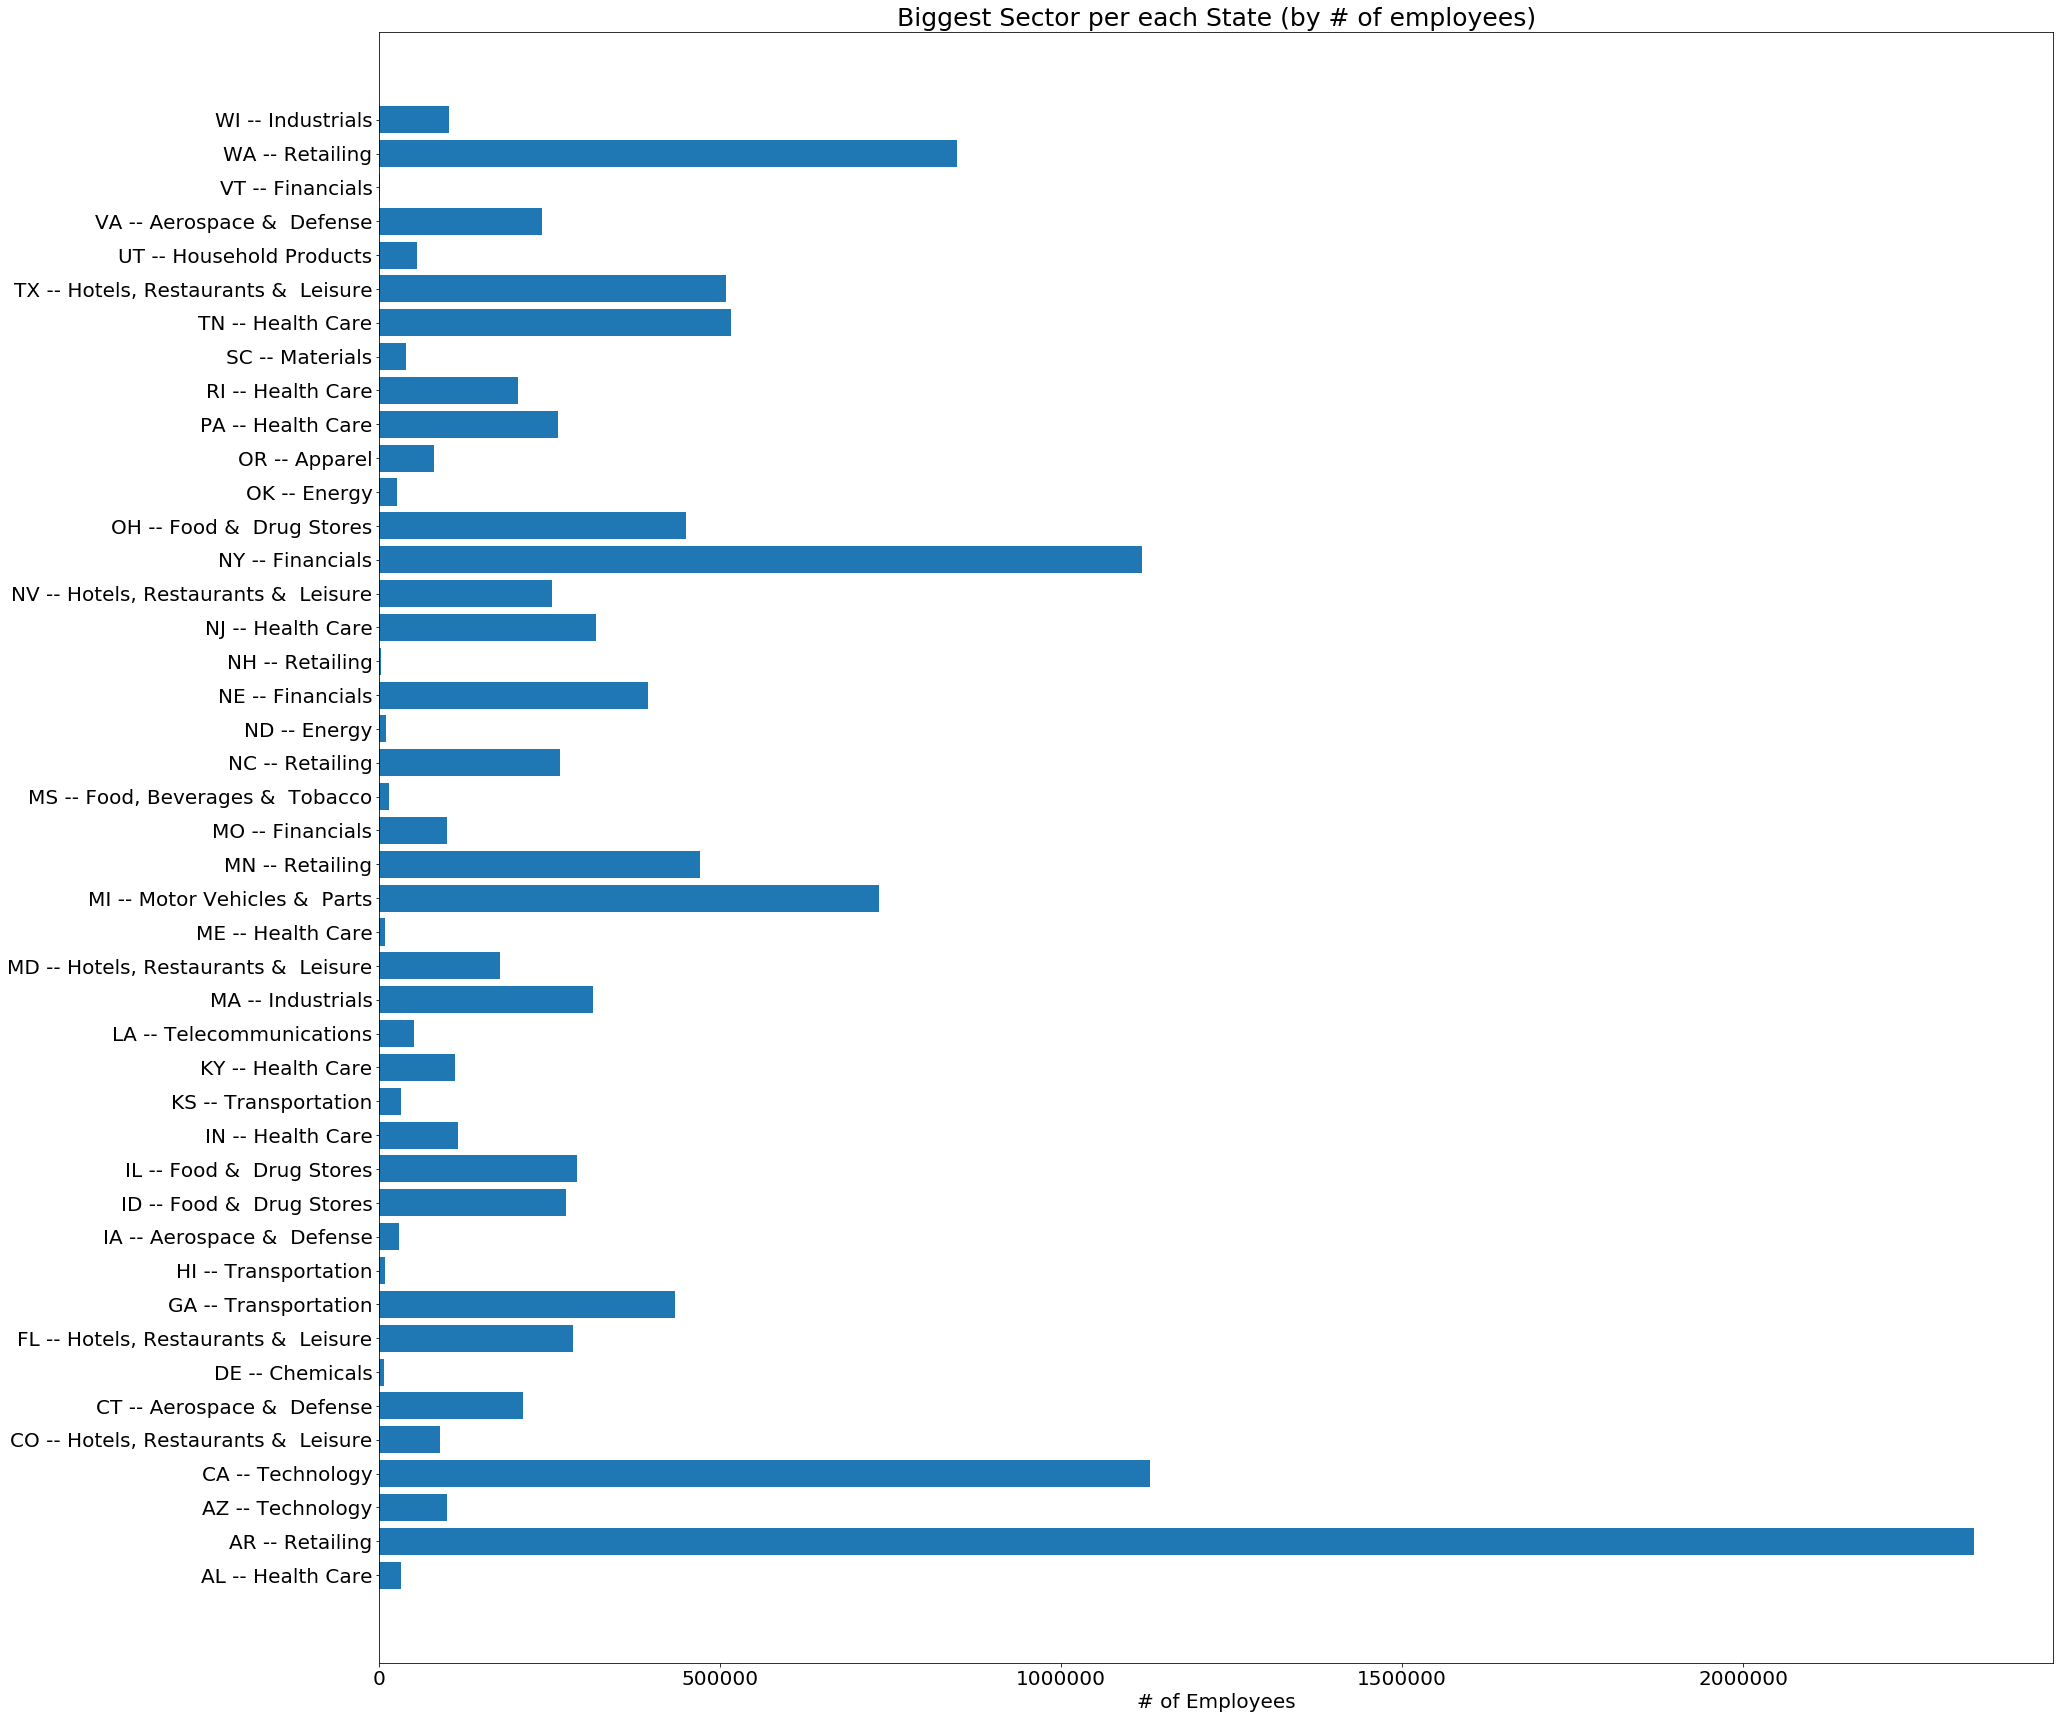

In [15]:
plt.figure(figsize=(30,30))
plt.barh(df_final_5["State & Sector"], df_final_5["# Employees"])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("# of Employees", fontsize=20)
plt.title("Biggest Sector per each State (by # of employees)", fontsize=25)
plt.savefig("Images/SectorPopularityPerState.png")